**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
class_name = 'Occupancy'
df = pd.read_csv('occupancy_data/datatraining.txt', skipinitialspace=True, na_values='?', keep_default_na=True)
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [3]:
def daytime(h):
    if 6 <= h < 13:
        return 'morning'
    elif 13 <= h < 18:
        return 'afternoon'
    elif 18 <= h < 22:
        return 'evening'
    return 'night'

In [4]:
df['daytime'] = [daytime(d.hour) for d in pd.to_datetime(df['date'])]
df['weekend'] = [1 if d.weekday() >= 5 else 0 for d in pd.to_datetime(df['date'])]
columns2remove = ['date']
df.drop(columns2remove, inplace=True, axis=1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,daytime,weekend
1,23.18,27.2720,426.0,721.25,0.004793,1,afternoon,0
2,23.15,27.2675,429.5,714.00,0.004783,1,afternoon,0
3,23.15,27.2450,426.0,713.50,0.004779,1,afternoon,0
4,23.15,27.2000,426.0,708.25,0.004772,1,afternoon,0
5,23.10,27.2000,426.0,704.50,0.004757,1,afternoon,0


In [5]:
df0 = df.copy()

In [6]:
dfX = pd.get_dummies(df[[c for c in df.columns if c != class_name]], prefix_sep='=')
dfY = df[class_name]
df = pd.concat([dfX, dfY], axis=1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,weekend,daytime=afternoon,daytime=evening,daytime=morning,daytime=night,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,0,1,0,0,0,1
2,23.15,27.2675,429.5,714.00,0.004783,0,1,0,0,0,1
3,23.15,27.2450,426.0,713.50,0.004779,0,1,0,0,0,1
4,23.15,27.2000,426.0,708.25,0.004772,0,1,0,0,0,1
5,23.10,27.2000,426.0,704.50,0.004757,0,1,0,0,0,1


# Data Partitioning

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [8]:
attributes = [col for col in df.columns if col != 'Temperature']
X = df[attributes].values
y = df['Temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [10]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [11]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-6.35936743e-01  7.76131647e-04 -7.54934825e-04  4.27466249e+03
  8.48265080e-03  1.73655755e-02  1.63978406e-02  8.18977603e-03
 -4.19531906e-02 -1.33893177e-01]
Intercept: 
 20.87008113157093


In [12]:
y_pred = reg.predict(X_test)

In [13]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.979
MSE: 0.021
MAE: 0.111


## Linear Regression in 2 dimensions

In [14]:
reg = LinearRegression()
reg.fit(X_train.T[1].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[1].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.448
MSE: 0.578
MAE: 0.613


In [15]:
x_values = sorted([v for v in X_test.T[1]])
y_values = y_pred[np.argsort(X_test.T[1])]

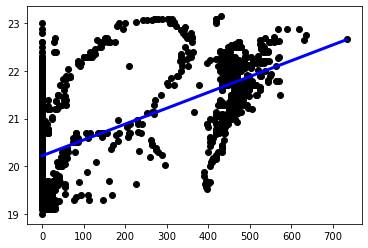

In [16]:
plt.scatter(X_test.T[1], y_test,  color='black')
plt.plot(x_values, y_values, color='blue', linewidth=3)
plt.show()

# Lasso

In [17]:
reg = Lasso()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.02356825  0.00216907  0.00110062 -0.         -0.          0.
  0.         -0.         -0.         -0.        ]
Intercept: 
 20.2999228132136


In [18]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.519
MSE: 0.504
MAE: 0.574


# Ridge

In [19]:
reg = Ridge()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-5.34836038e-02  4.22145608e-03  1.17257297e-03  4.00573255e-01
 -6.61714036e-01  3.38525963e-01  1.67917723e-01 -2.79944217e-01
 -2.26499470e-01 -1.44392290e+00]
Intercept: 
 21.386519584380373


In [20]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.695
MSE: 0.320
MAE: 0.434


# Slides Example

Coefficients: 
 [58.87472632]
Mean squared error: 3.40
Coefficient of determination: 0.93
1.432665401644528


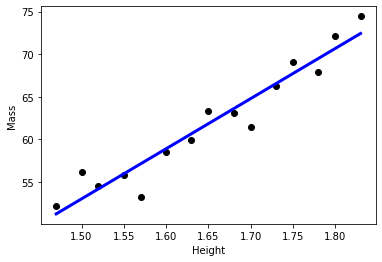

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model

Height = np.array([1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83])
Mass = np.array([52.21, 56.12, 54.48, 55.84, 53.20, 58.57, 59.93, 63.29, 63.11, 61.47, 66.28, 69.10, 67.92, 
                 72.19, 74.46])

diabetes_X_train = Height
diabetes_y_train = Mass

diabetes_X_test = Height
diabetes_y_test = Mass

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train.reshape(-1, 1), diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test.reshape(-1, 1))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))
print(mean_absolute_error(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xlabel('Height')
plt.ylabel('Mass')

#plt.xticks(())
#plt.yticks(())

plt.show()

# Logistic Regression

In [22]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [23]:
selected_columns = ['Light'] # Light, Temperature

attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [24]:
X.shape

(8143, 1)

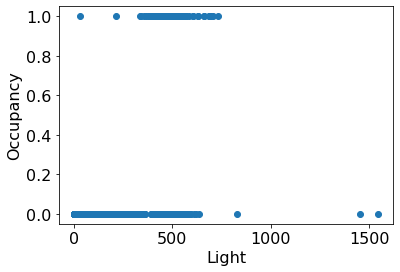

In [25]:
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [31]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9828080229226361
F1-score [0.98898794 0.9608209 ]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1924
           1       0.93      0.99      0.96       519

    accuracy                           0.98      2443
   macro avg       0.96      0.99      0.97      2443
weighted avg       0.98      0.98      0.98      2443



In [32]:
from scipy.special import expit

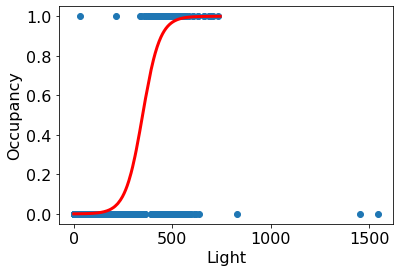

In [33]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [34]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

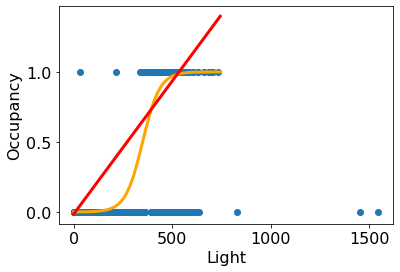

In [35]:
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)

plt.plot(sorted(X_test), reg.coef_ * sorted(X_test) + reg.intercept_, color='red', linewidth=3)


plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [36]:
hours = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 
         3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]).reshape(-1, 1)
exam_passed = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]).reshape(-1, 1)

In [37]:
clf = LogisticRegression(random_state=0)
clf.fit(hours, exam_passed)

/home/dm2/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [38]:
print(clf.coef_)
print(clf.intercept_)

[[1.14860386]]
[-3.13952411]


In [39]:
x = 1

In [40]:
print('Log-odds of passing exam', clf.coef_[0][0] * x + clf.intercept_[0])
print('Odds of passing exam', np.e**(clf.coef_[0][0] * x + clf.intercept_[0]))

Log-odds of passing exam -1.9909202424586012
Odds of passing exam 0.13656969037338149


In [41]:
def proba(x, beta0, beta1):
    return 1/(1+np.e**(-(beta1 * x + beta0)))

In [42]:
proba(0.5, clf.intercept_[0], clf.coef_[0][0])

0.07141047851885024

In [43]:
proba(1, clf.intercept_[0], clf.coef_[0][0])

0.12015953929628034

In [44]:
proba(2, clf.intercept_[0], clf.coef_[0][0])

0.30104715244294333

In [45]:
proba(3, clf.intercept_[0], clf.coef_[0][0])

0.5759788210742368

In [46]:
np.e**(clf.coef_[0][0])

3.1537867213478545

In [47]:
proba(2, -4.0777, 1.5046)

0.25568844734059615

In [48]:
proba(3, -4.0777, 1.5046)

0.6073293474722868

In [49]:
proba(4, -4.0777, 1.5046)

0.8744290256656763

In [50]:
np.e**1.5046

4.502352329120619

In [51]:
np.e**(1.5046 * 3 -4.0777)/np.e**(1.5046 * 2 -4.0777)

4.502352329120619

In [52]:
np.e**(1.5046 * 4 -4.0777)/np.e**(1.5046 * 3 -4.0777)

4.502352329120619